In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
gdpFullDf = pd.read_csv('gdp_per_hour_worked_filtered.csv', index_col=0)
# Creating columnn for gdp over labor force to match the column in the original article
gdpFullDf['gdp_over_labor_force'] = gdpFullDf['gdp'] / gdpFullDf['labor_force']

CrimeFullDf = pd.read_csv('HomicideCountsByCountry_2007-2022.csv', index_col=0)
CrimeFullDf.rename(columns={'Iso3_code': 'iso3c', 'Country':'country', 'VALUE':'Victim Count'}, inplace=True)

In [3]:
gdpFullDf.head()

,year,iso3c,country,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,hours_worked,...,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c,continent,penn_hours_worked_over_pop,hours_worked_over_pop,hours_worked_over_pop_combined,hours_worked_over_pop_predicted,hours_worked_over_pop_modelled,gdp_over_labor_force
12632,2007,AUS,Australia,20827622.0,10937240.0,9.186995e+11,7.628943e+11,8.544273e+11,1.095250e+12,1803.000000,...,44109.669374,52586.409390,47828.591243,5.0,895.758812,922.244796,922.244796,910.891221,922.244796,78120.920741
12633,2007,AUT,Austria,8295487.0,4201262.0,4.360529e+11,3.271376e+11,3.891856e+11,3.644847e+11,1606.428996,...,52565.073969,43937.712891,67645.310343,4.0,829.445365,777.069005,777.069005,751.812698,777.069005,92635.396580
12636,2007,BEL,Belgium,10625700.0,4728844.0,5.163070e+11,3.909816e+11,4.709222e+11,4.281119e+11,1593.657532,...,48590.400535,40290.227756,73741.553706,4.0,658.800675,658.928353,658.928353,751.812698,658.928353,99585.047912
12654,2007,CAN,Canada,32889025.0,18382598.0,1.509263e+12,1.301593e+12,1.468820e+12,1.384576e+12,1745.000000,...,45889.562129,42098.431220,50845.133236,2.0,898.870758,902.535980,902.535980,872.685869,902.535980,79902.764984
12656,2007,CHE,Switzerland,7551117.0,4307257.0,4.924324e+11,3.845359e+11,4.907547e+11,6.135597e+11,1668.900000,...,65213.180537,81254.170050,69663.070107,4.0,943.117746,936.122689,936.122689,814.328625,936.122689,113936.708168


In [4]:
countryCodes = [
    'AUS', 'AUT', 'BEL', 'CAN', 'HRV', 
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 
    'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 
    'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 
    'LUX', 'NLD', 'NZL', 'NOR', 'POL', 
    'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 
    'CHE', 'GBR', 'USA'
]

# for country in countryCodes:
#     print(country)
#     print(CrimeFullDf[CrimeFullDf['iso3c'] == country]['year'])

In [5]:
CrimeFullDf.head()

,iso3c,country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,Victim Count,Source,Unnamed: 13
0,AUS,Australia,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,255.0,MD/Eurostat/GSH 2019 Revision/CTS,NaN
1,AUT,Austria,Europe,Western Europe,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,45.0,UNSDC/Eurostat/CTS/GSH 2023 Revision,NaN
2,CAN,Canada,Americas,Northern America,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,597.0,NSO/OAS/CTS/SDG/GSH 2023 Revision,NaN
3,CZE,Czechia,Europe,Eastern Europe,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,126.0,Eurostat/UNSDC/GSH 2019 Revision/CTS,NaN
4,DEU,Germany,Europe,Western Europe,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,888.0,SDG/CTS/NP,NaN


In [6]:
CrimeFullDf.drop(CrimeFullDf[(CrimeFullDf['iso3c'] == 'BEL') & (CrimeFullDf['Year'] == 2020)].index, axis=0, inplace=True)
CrimeFullDf[CrimeFullDf['iso3c'] == 'NZL'].head(40)

,iso3c,country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,Victim Count,Source,Unnamed: 13
21,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2007,Counts,48.0,WHO Adjusted/UNSDC/NP/CTS,NaN
47,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2008,Counts,51.0,WHO Adjusted/UNSDC/NP/CTS,NaN
75,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2009,Counts,67.0,WHO Adjusted/UNSDC/NP/CTS,NaN
103,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2010,Counts,43.0,WHO Adjusted/UNSDC/NP/CTS,NaN
131,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2011,Counts,39.0,WHO Adjusted/UNSDC/NP/CTS,NaN
160,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2012,Counts,41.0,WHO Adjusted/UNSDC/NP/CTS,NaN
189,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2013,Counts,46.0,WHO Adjusted/UNSDC/NP/CTS,NaN
218,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2014,Counts,43.0,WHO Adjusted/UNSDC/NP/CTS,NaN
247,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2015,Counts,48.0,WHO Adjusted/UNSDC/NP/CTS,NaN
276,NZL,New Zealand,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,2016,Counts,50.0,WHO Adjusted/UNSDC/NP/CTS,NaN


In [7]:
CrimeSelectColumns = CrimeFullDf[['Year', 'iso3c', 'country', 'Victim Count']]
GdpSelectColumns = gdpFullDf[['year', 'iso3c', 'country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c', 'pop']]
GdpSelectColumns.rename(columns={'gdp_over_labor_force': 'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker', 
                                 'gdp_ppp_over_k_hours_worked_c': 'PPP per Hour Worked', 'year':'Year'}, inplace=True)

/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_1854/3726706730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GdpSelectColumns.rename(columns={'gdp_over_labor_force': 'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker',


In [8]:
HomAndGdp = pd.merge(CrimeSelectColumns, GdpSelectColumns, on=['Year', 'iso3c'], how='inner')

In [9]:
HomAndGdp.rename(columns={'country_x':'country'}, inplace=True)
HomAndGdp.drop(columns={'country_y'}, inplace=True)

In [10]:
# Adding Victim Count per 100,000 population
HomAndGdp['Victims per 100,000 population'] = HomAndGdp['Victim Count'] / (HomAndGdp['pop'] / 100000)
HomAndGdp.head()

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population"
0,2007,AUS,Australia,255.0,78120.920741,69751.995589,47828.591243,20827622.0,1.224336
1,2007,AUT,Austria,45.0,92635.396580,77866.496956,67645.310343,8295487.0,0.542464
2,2007,CAN,Canada,597.0,79902.764984,70805.734407,50845.133236,32889025.0,1.815195
3,2007,CZE,Czechia,126.0,36654.903469,52175.331212,38682.898921,10298828.0,1.223440
4,2007,DEU,Germany,888.0,81831.734844,71321.753851,66168.565867,82266372.0,1.079420


In [11]:
HomAndGdp.head()

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population"
0,2007,AUS,Australia,255.0,78120.920741,69751.995589,47828.591243,20827622.0,1.224336
1,2007,AUT,Austria,45.0,92635.396580,77866.496956,67645.310343,8295487.0,0.542464
2,2007,CAN,Canada,597.0,79902.764984,70805.734407,50845.133236,32889025.0,1.815195
3,2007,CZE,Czechia,126.0,36654.903469,52175.331212,38682.898921,10298828.0,1.223440
4,2007,DEU,Germany,888.0,81831.734844,71321.753851,66168.565867,82266372.0,1.079420


In [12]:
HomAndGdp[HomAndGdp['iso3c'] == 'USA'][['Year', 'Victim Count', 'GDP per Worker', 'GDP PPP per Worker', 'PPP per Hour Worked']].corr()

,Year,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked
Year,1.000000,0.694380,0.971054,0.971054,0.961617
Victim Count,0.694380,1.000000,0.767034,0.767034,0.702107
GDP per Worker,0.971054,0.767034,1.000000,1.000000,0.922858
GDP PPP per Worker,0.971054,0.767034,1.000000,1.000000,0.922858
PPP per Hour Worked,0.961617,0.702107,0.922858,0.922858,1.000000


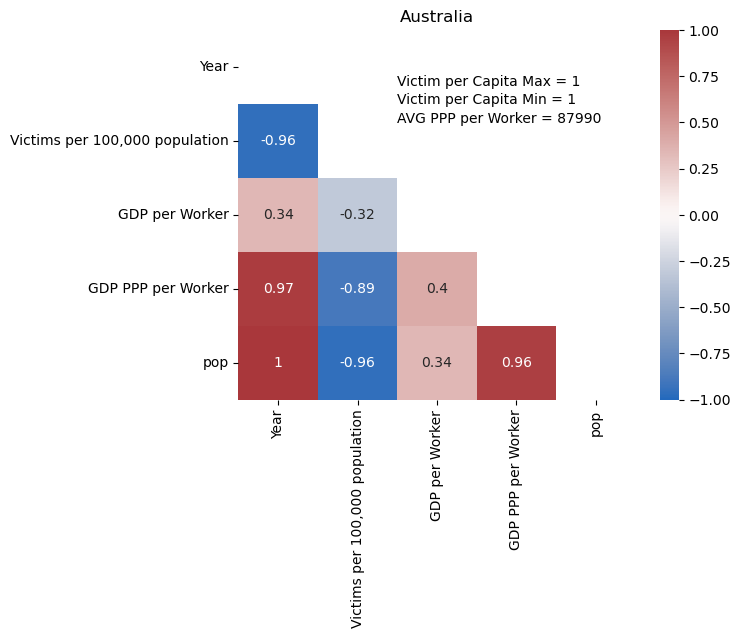

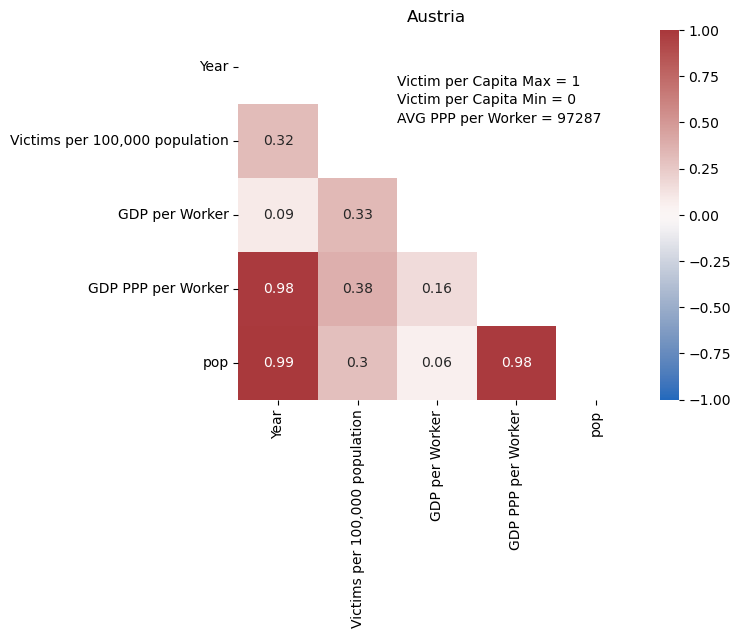

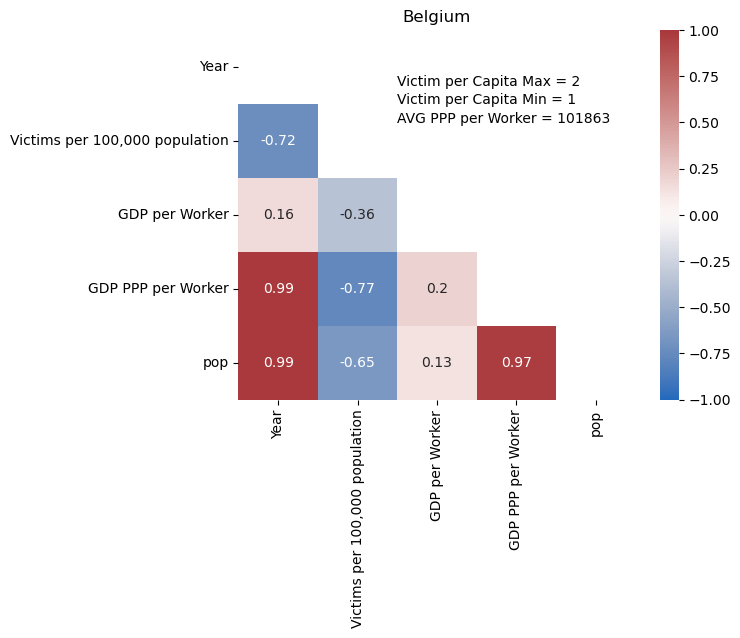

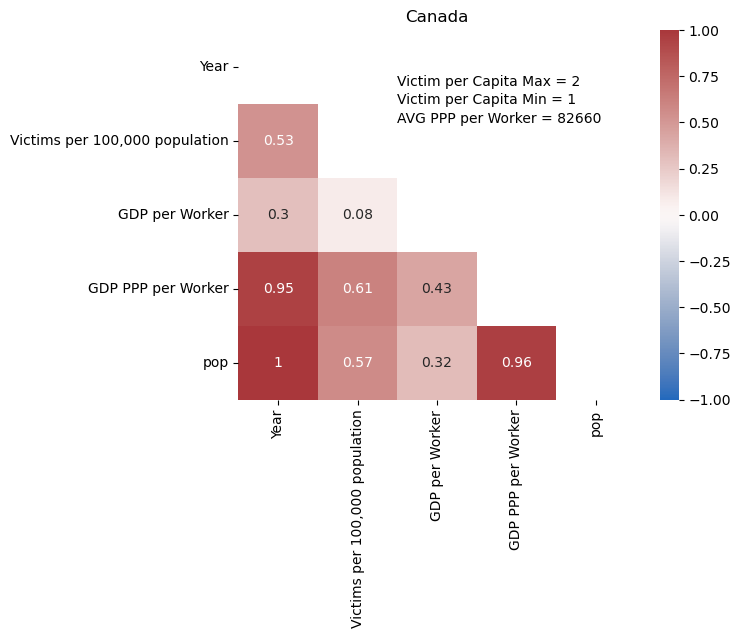

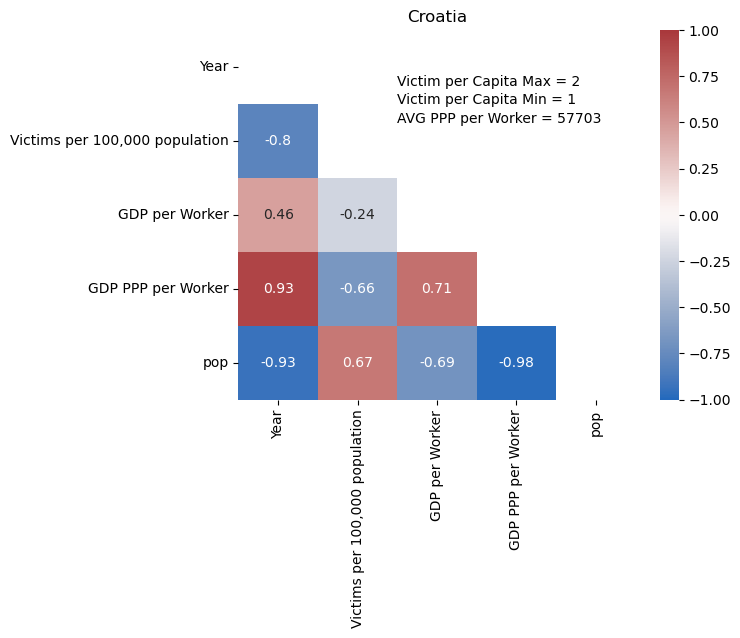

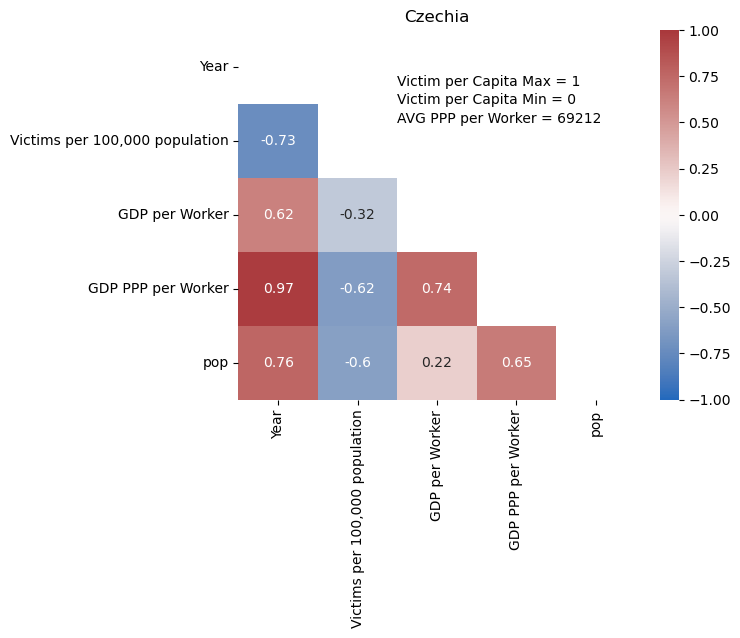

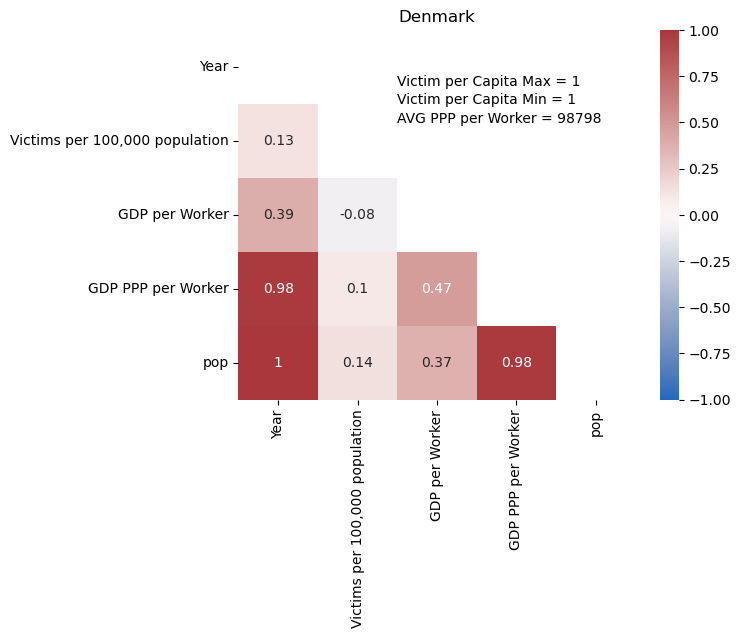

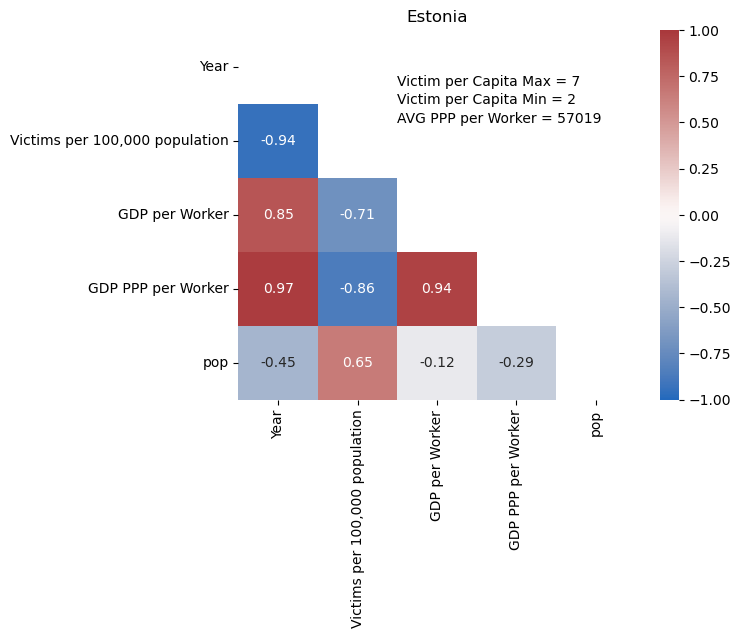

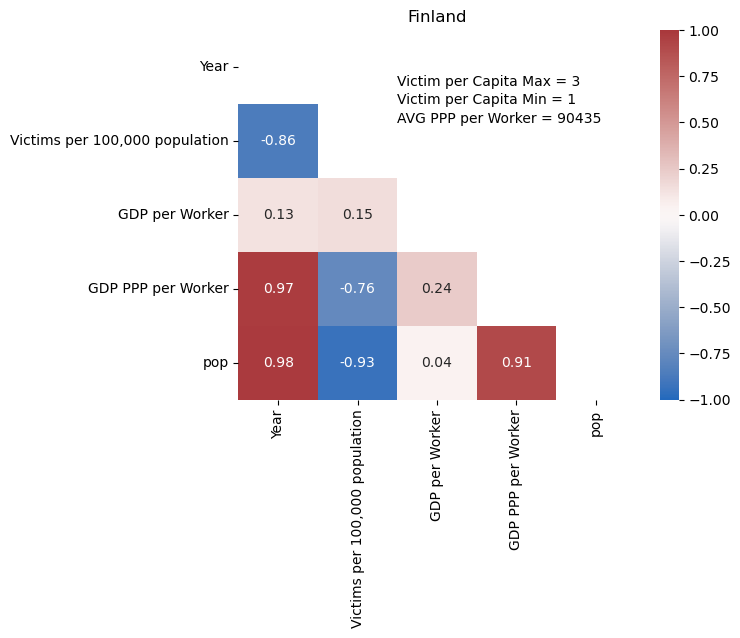

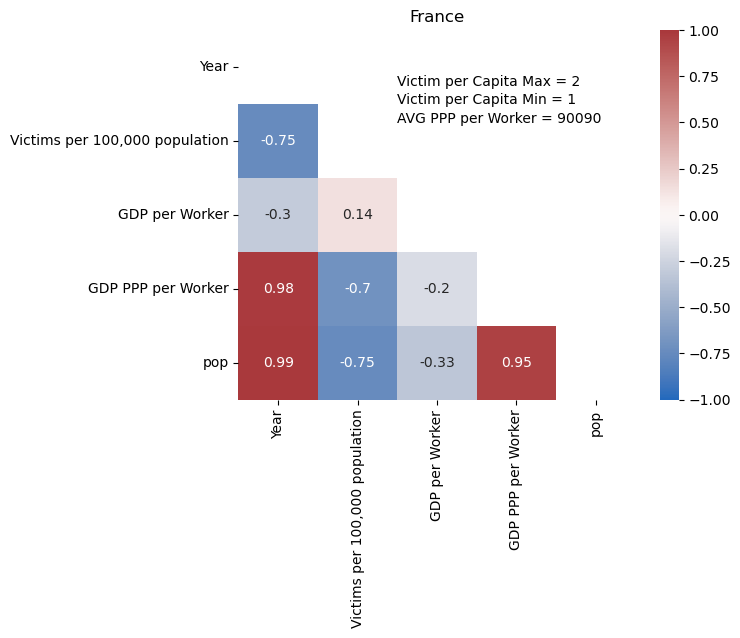

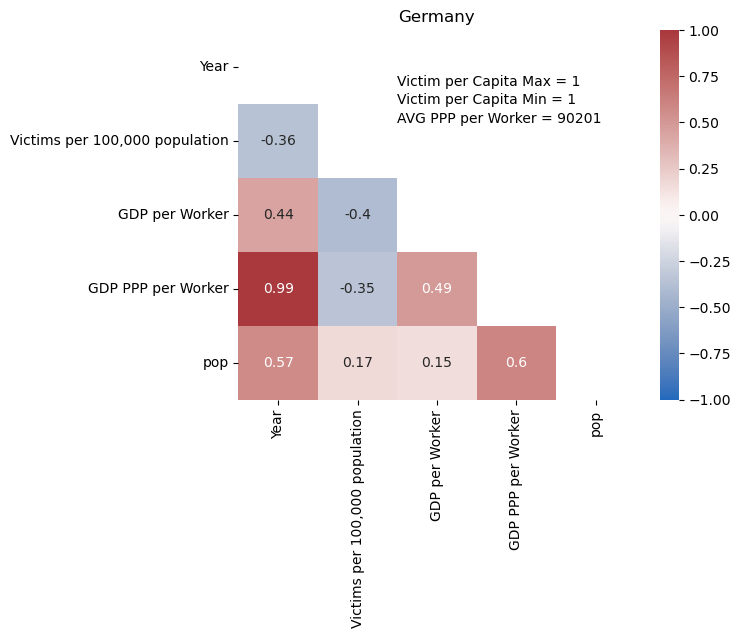

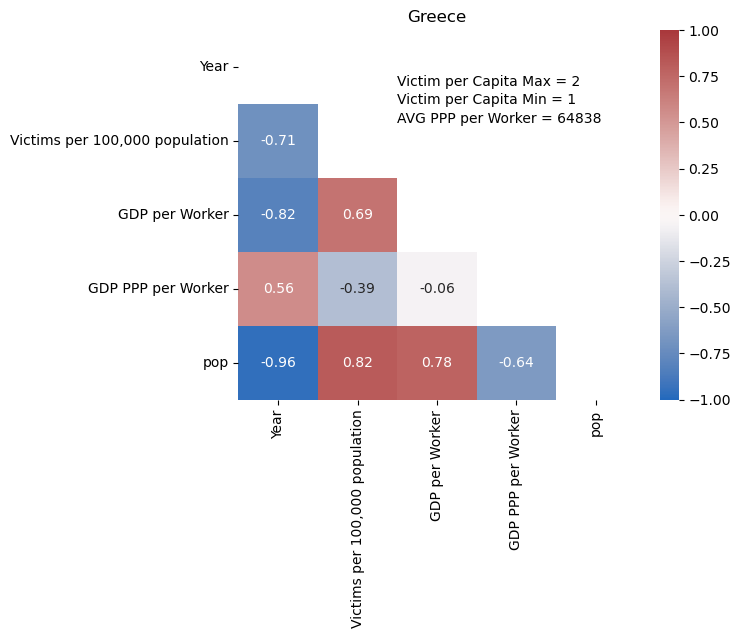

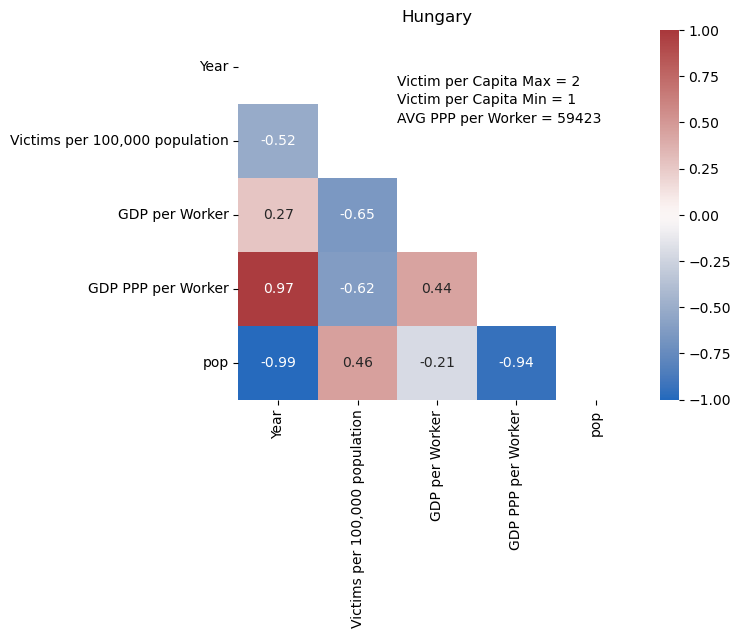

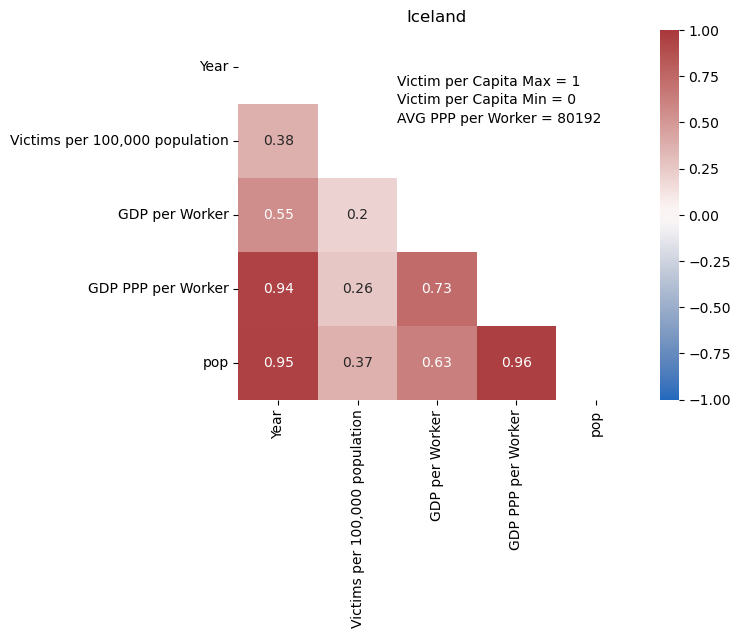

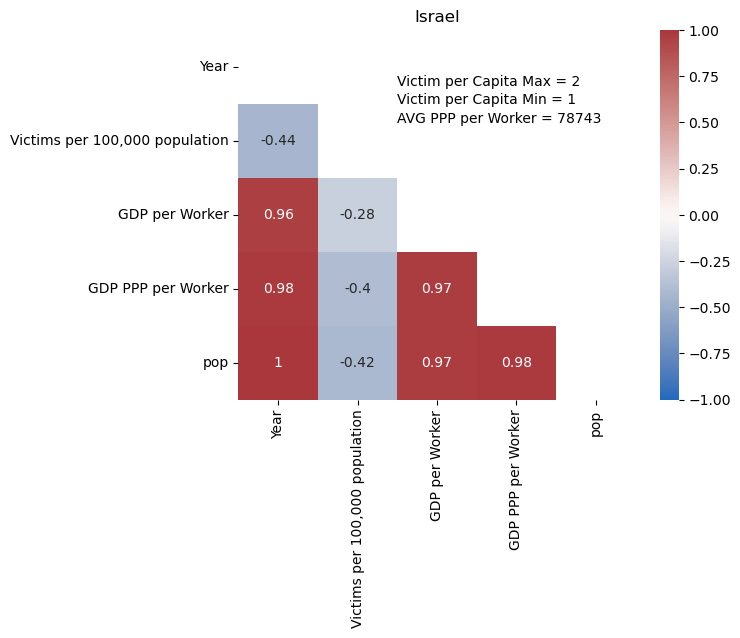

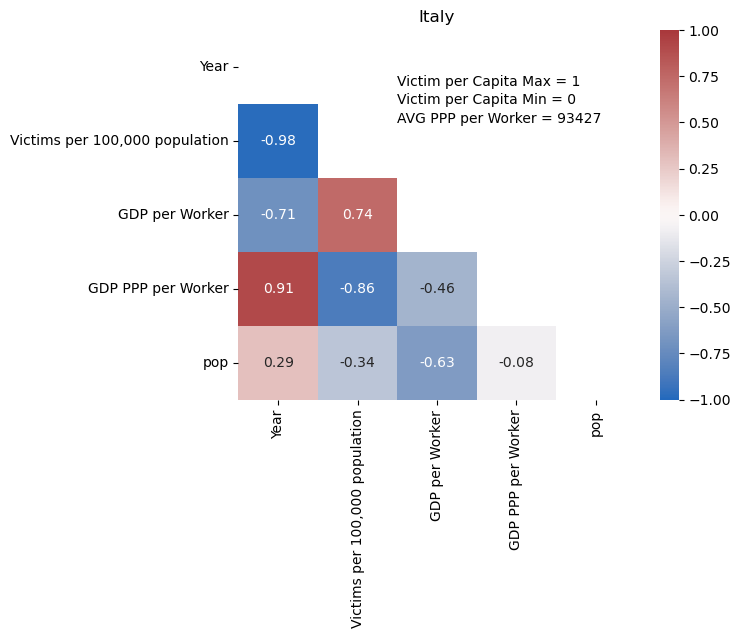

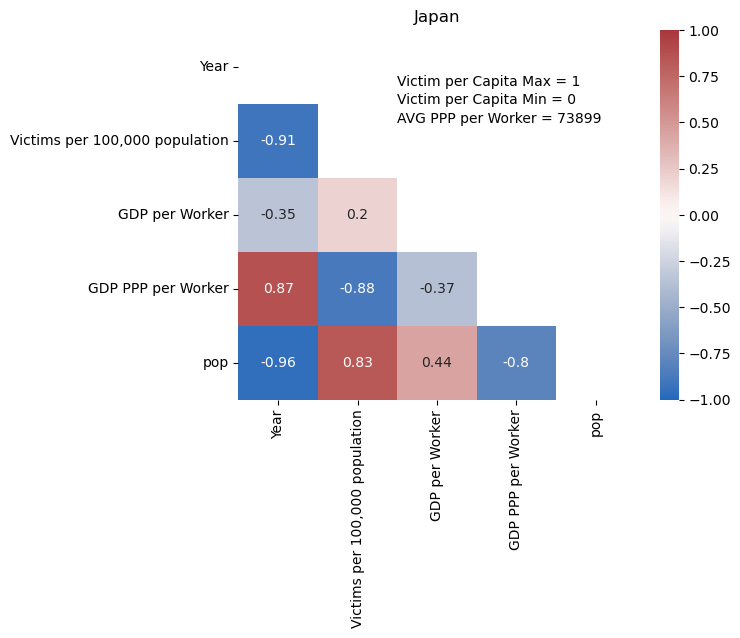

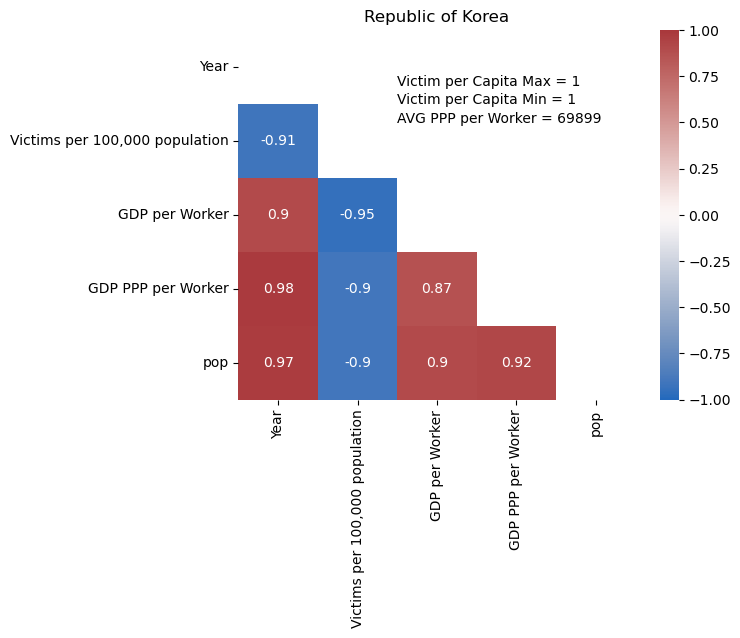

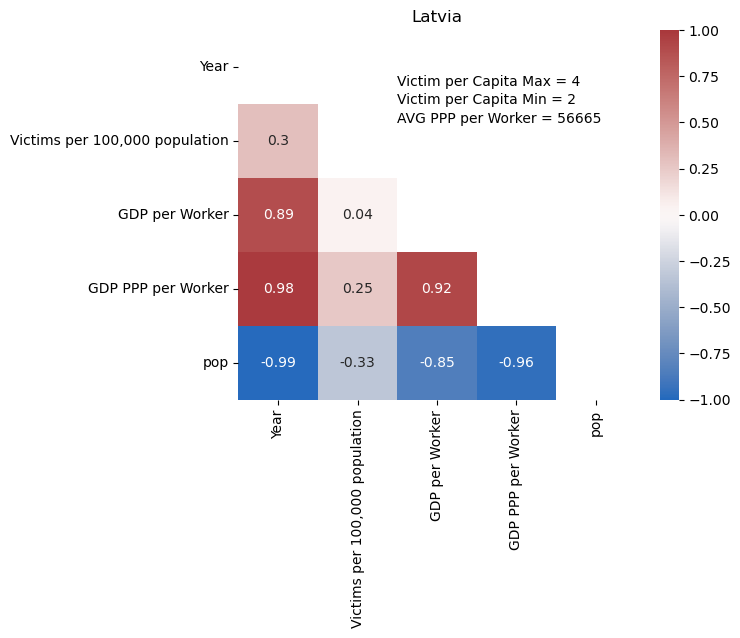

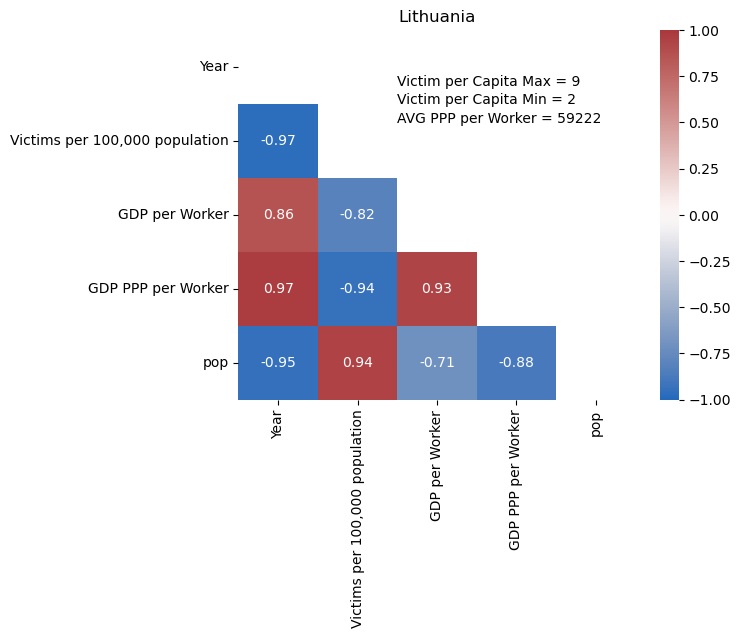

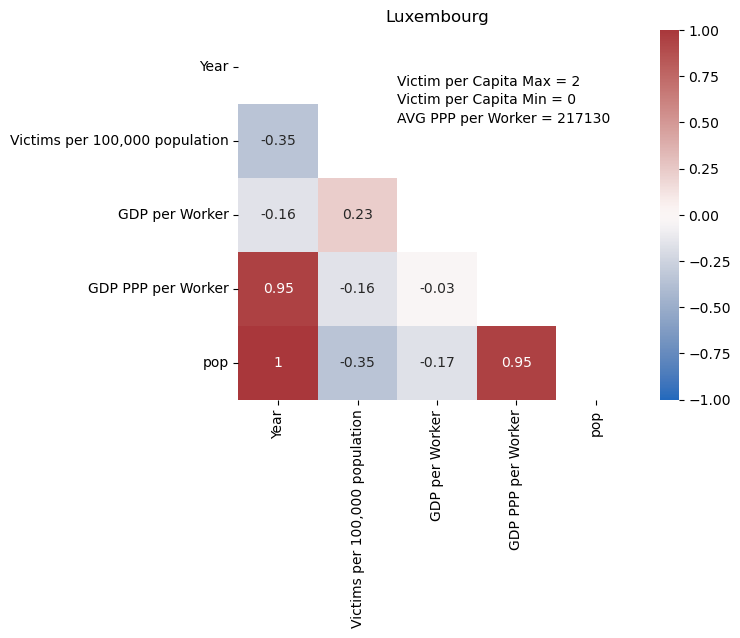

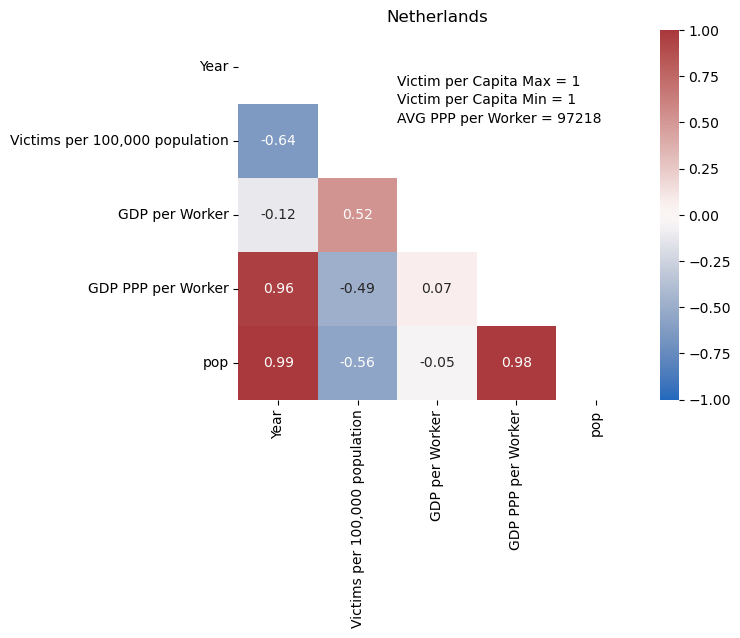

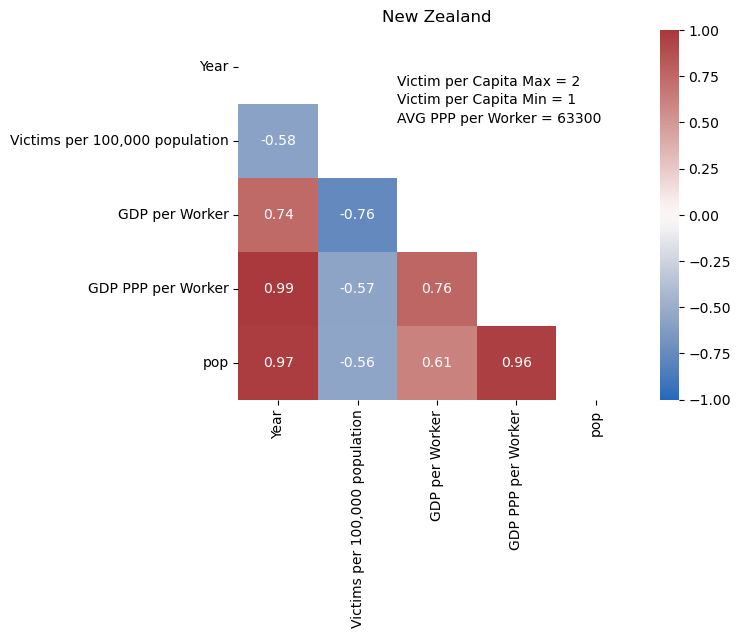

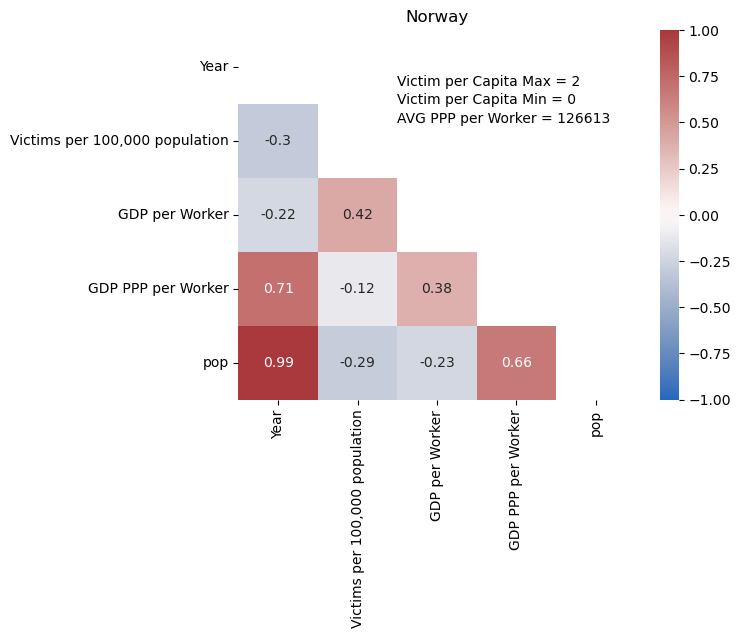

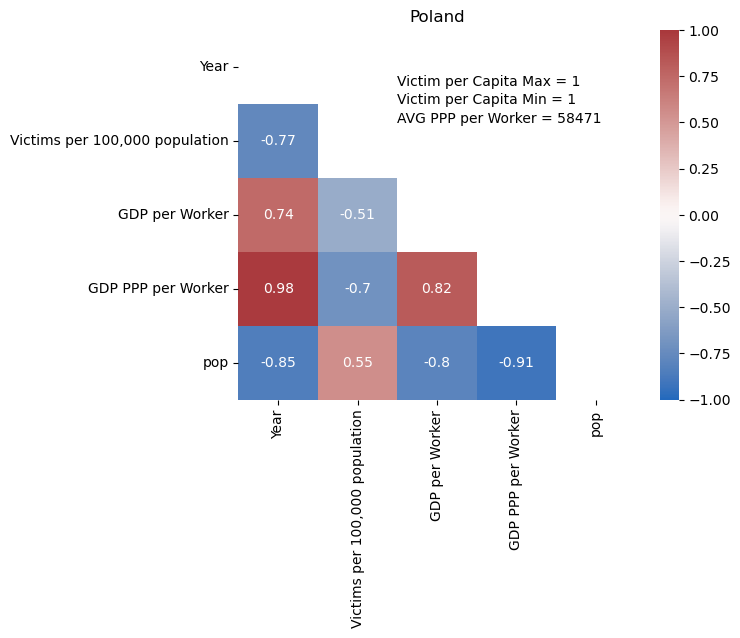

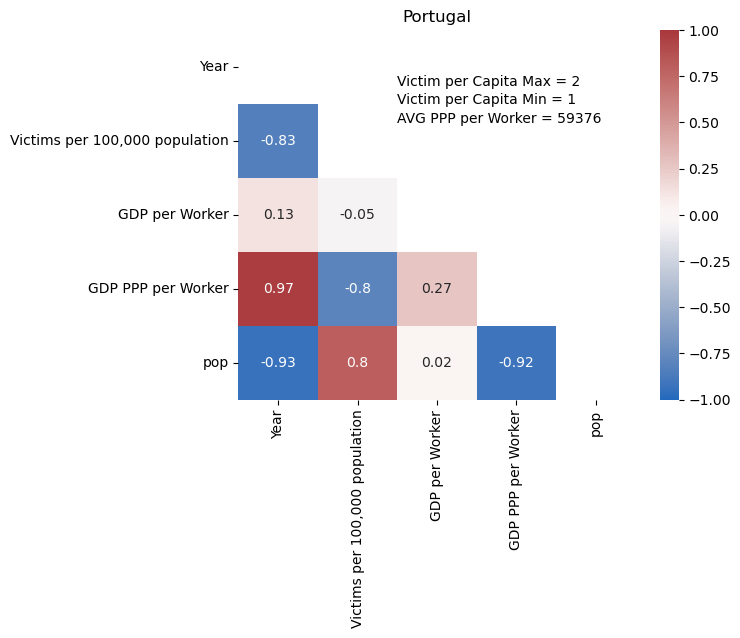

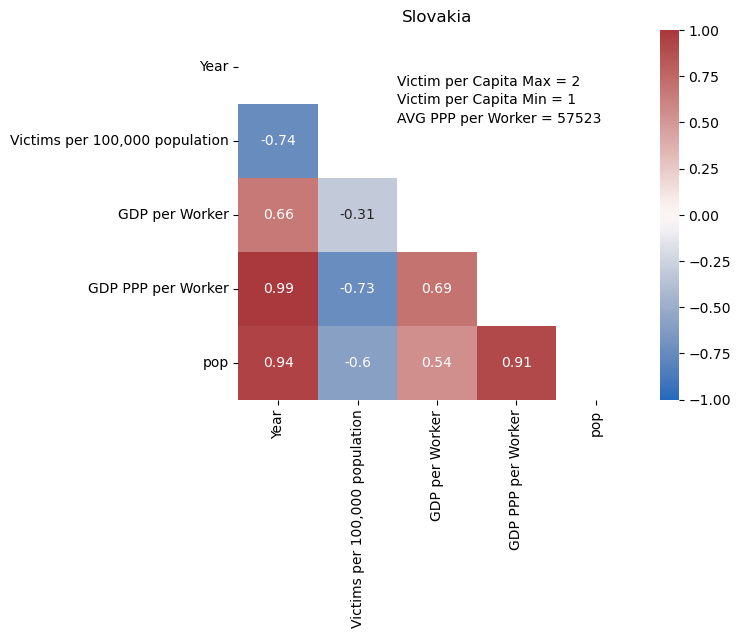

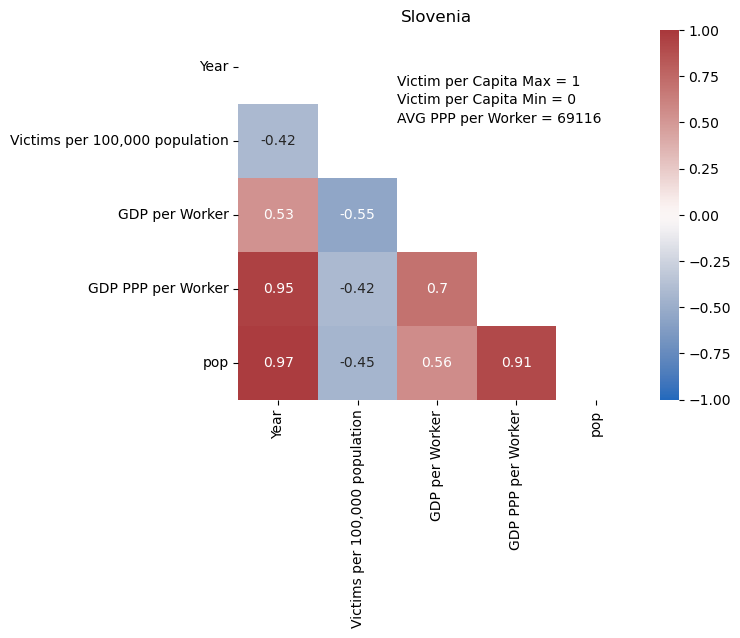

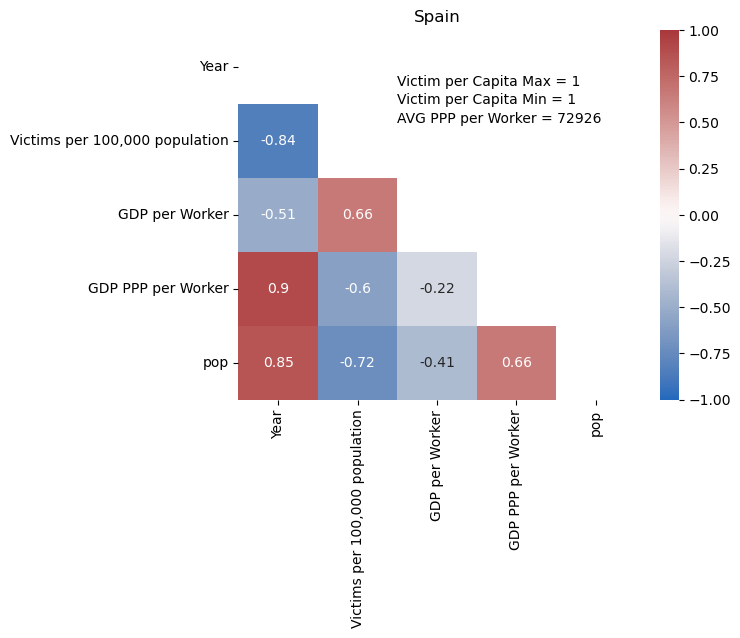

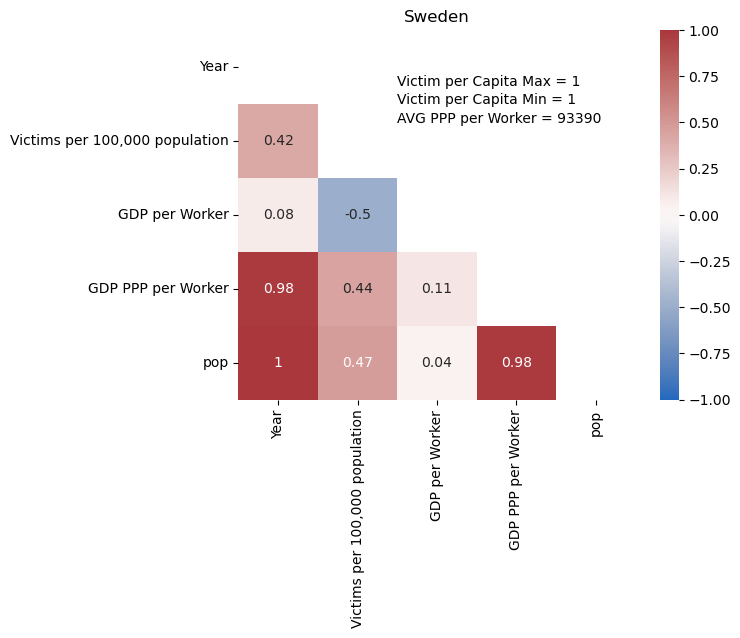

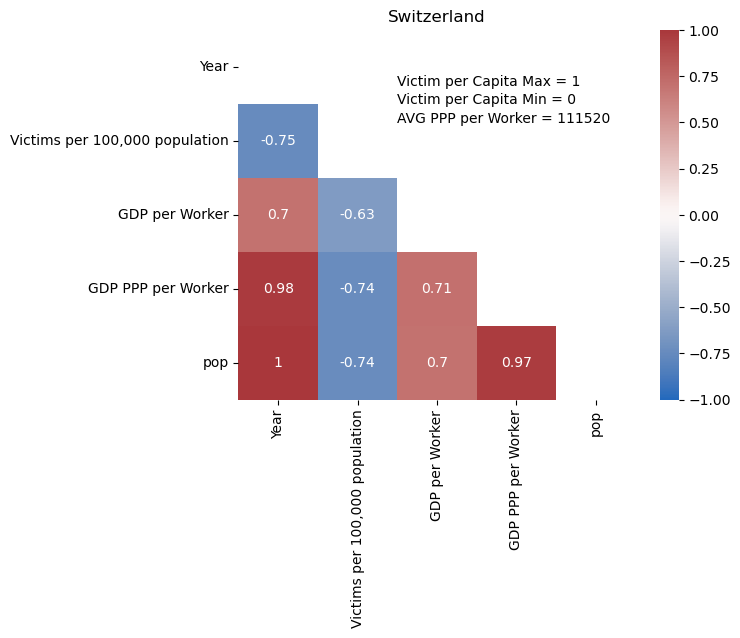

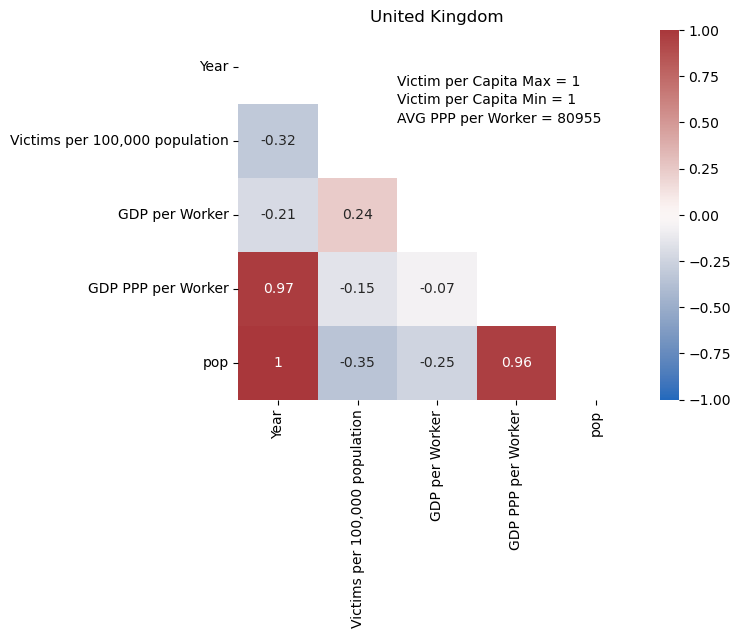

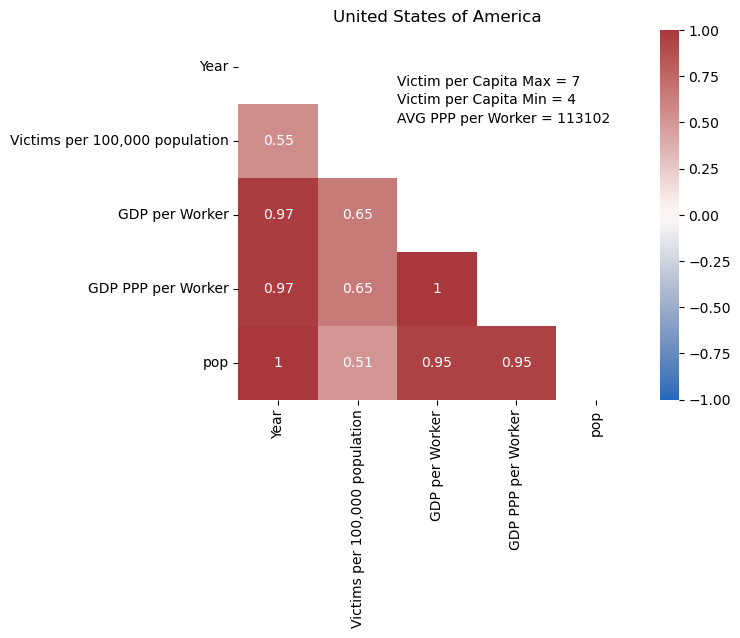

In [25]:
for idex, code in enumerate(countryCodes):
    matrix = HomAndGdp[HomAndGdp['iso3c'] == code][['Year', 'Victims per 100,000 population', 'GDP per Worker', 'GDP PPP per Worker', 'pop']].corr().round(2)
    VictimCountMax = HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].max()
    VictimCountMin = HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].min()
    PPPperWorkerAvg = HomAndGdp[HomAndGdp['iso3c'] == code]['GDP PPP per Worker'].mean()

    mask = np.triu(np.ones_like(matrix, dtype=bool))
    heatMap = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    ax = plt.gca()

    plt.text(.4, .85, "Victim per Capita Max = {}".format(round(VictimCountMax)), transform=ax.transAxes)
    plt.text(.4, .8, "Victim per Capita Min = {}".format(round(VictimCountMin)), transform=ax.transAxes)
    plt.text(.4, .75, "AVG PPP per Worker = {}".format(round(PPPperWorkerAvg)), transform=ax.transAxes)
    plt.title(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False))
    fig = heatMap.get_figure()
    # fig.savefig('GdpAndCrime_HeatMap_{}'.format(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False)), dpi=300, bbox_inches='tight')
    plt.show()

In [13]:
HomAndGdp[HomAndGdp['iso3c'] == 'ITA'][['GDP per Worker', 'GDP PPP per Worker', 'Victim Count', 'Year']].corr()

,GDP per Worker,GDP PPP per Worker,Victim Count,Year
GDP per Worker,1.000000,-0.462935,0.723350,-0.710595
GDP PPP per Worker,-0.462935,1.000000,-0.877805,0.912997
Victim Count,0.723350,-0.877805,1.000000,-0.980976
Year,-0.710595,0.912997,-0.980976,1.000000


In [44]:
HomAndGdp['Pop in millions'] = HomAndGdp['pop'] / 1000000

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population",Pop in Hundred Thousands,Pop in millions
0,2007,AUS,Australia,255.00,78120.92,69752.00,47828.59,20827622.00,1.22,208.28,20.83
1,2007,AUT,Austria,45.00,92635.40,77866.50,67645.31,8295487.00,0.54,82.95,8.30
2,2007,CAN,Canada,597.00,79902.76,70805.73,50845.13,32889025.00,1.82,328.89,32.89
3,2007,CZE,Czechia,126.00,36654.90,52175.33,38682.90,10298828.00,1.22,102.99,10.30
4,2007,DEU,Germany,888.00,81831.73,71321.75,66168.57,82266372.00,1.08,822.66,82.27


In [46]:
HomAndGdp.head()

,Year,iso3c,country,Victim Count,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked,pop,"Victims per 100,000 population",Pop in Hundred Thousands,Pop in millions
0,2007,AUS,Australia,255.00,78120.92,69752.00,47828.59,20827622.00,1.22,208.28,20.83
1,2007,AUT,Austria,45.00,92635.40,77866.50,67645.31,8295487.00,0.54,82.95,8.30
2,2007,CAN,Canada,597.00,79902.76,70805.73,50845.13,32889025.00,1.82,328.89,32.89
3,2007,CZE,Czechia,126.00,36654.90,52175.33,38682.90,10298828.00,1.22,102.99,10.30
4,2007,DEU,Germany,888.00,81831.73,71321.75,66168.57,82266372.00,1.08,822.66,82.27


In [14]:
for index, code in enumerate(countryCodes):
    Co2Gdp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[0,2].round(2)
    Co2Ppp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[1,2].round(2)
    if (Co2Gdp < -.75 or Co2Ppp < -.75):
        print(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False))

Australia
Belgium
Estonia
Finland
Italy
Japan
Republic of Korea
Lithuania
New Zealand
Portugal


In [29]:
for index, code in enumerate(countryCodes):
    Co2Gdp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[0,2].round(2)
    Co2Ppp = HomAndGdp[HomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Victims per 100,000 population', 'Year']].corr().iloc[1,2].round(2)
    if (Co2Ppp < -.74 or Co2Ppp > .74):
        print(HomAndGdp[(HomAndGdp['iso3c'] == code) & (HomAndGdp['Year'] == 2015)]['country'].to_string(index=False))

Australia
Belgium
Estonia
Finland
Italy
Japan
Republic of Korea
Lithuania
Portugal


In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
AvgHom = pd.DataFrame(columns = ['country', 'iso3c', 'Avg Victims per 100,000 population', 'Avg Population'])
for index, code in enumerate(countryCodes):
    popMean = round(HomAndGdp[HomAndGdp['iso3c'] == code]['pop'].mean(), 2)
    homMean = round(HomAndGdp[HomAndGdp['iso3c'] == code]['Victims per 100,000 population'].mean(), 2)
    newRow = pd.DataFrame([{'country':HomAndGdp[HomAndGdp['iso3c'] == code]['country'].unique()[0], 'iso3c':code, 
                            'Avg Victims per 100,000 population':homMean, 'Avg Population':popMean}])
    AvgHom = pd.concat([AvgHom, newRow], ignore_index=True)

In [17]:
AvgHom.sort_values('Avg Victims per 100,000 population', ascending=True)

,country,iso3c,"Avg Victims per 100,000 population",Avg Population
16,Japan,JPN,0.32,127262639.53
13,Iceland,ISL,0.57,334554.73
30,Switzerland,CHE,0.59,8203955.12
27,Slovenia,SVN,0.68,2064755.94
23,Norway,NOR,0.68,5124292.94
1,Austria,AUT,0.74,8624005.38
28,Spain,ESP,0.74,46661786.94
17,Republic of Korea,KOR,0.74,50629131.81
21,Netherlands,NLD,0.76,16965388.25
15,Italy,ITA,0.76,59689442.06


In [18]:
AvgHom.sort_values('Avg Population', ascending=False)

,country,iso3c,"Avg Victims per 100,000 population",Avg Population
32,United States of America,USA,5.31,318891432.25
16,Japan,JPN,0.32,127262639.53
10,Germany,DEU,0.93,81962172.80
9,France,FRA,1.23,66101480.00
31,United Kingdom,GBR,1.10,64536837.67
15,Italy,ITA,0.76,59689442.06
17,Republic of Korea,KOR,0.74,50629131.81
28,Spain,ESP,0.74,46661786.94
24,Poland,POL,0.82,37971856.60
3,Canada,CAN,1.79,35720711.06


In [50]:
positiveCountries = [
   'Canada', 'United States of America'
]

HomAndGdpPositiveCountries = HomAndGdp[HomAndGdp['country'].isin(positiveCountries)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


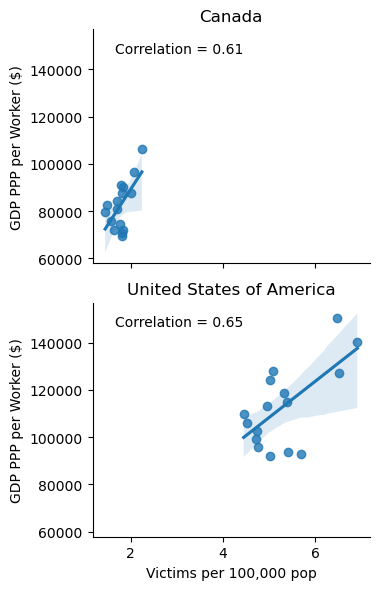

In [51]:
def annotatePerCap(data, **kws):
    r = data[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=1, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP PPP per Worker')
g.map_dataframe(annotatePerCap)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP PPP per Worker ($)")

# g.figure.subplots_adjust(top=0.8)
# g.figure.suptitle('Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanVictimPerCapCorrPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


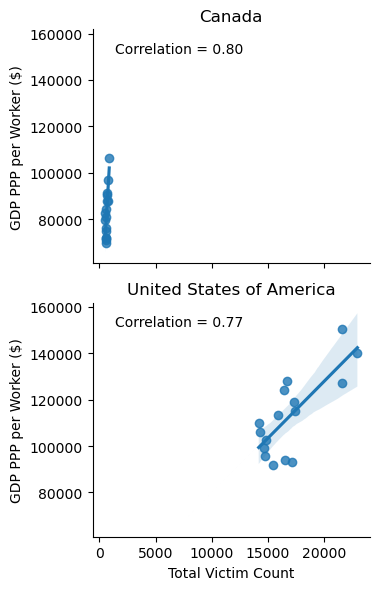

In [52]:
def annotatePerCap(data, **kws):
    r = data[['GDP PPP per Worker', 'Victim Count']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=1, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victim Count', y='GDP PPP per Worker')
g.map_dataframe(annotatePerCap)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Total Victim Count")
    ax.set_ylabel("GDP PPP per Worker ($)")

# g.figure.subplots_adjust(top=0.8)
# g.figure.suptitle('Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanTotalVictimCorrPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


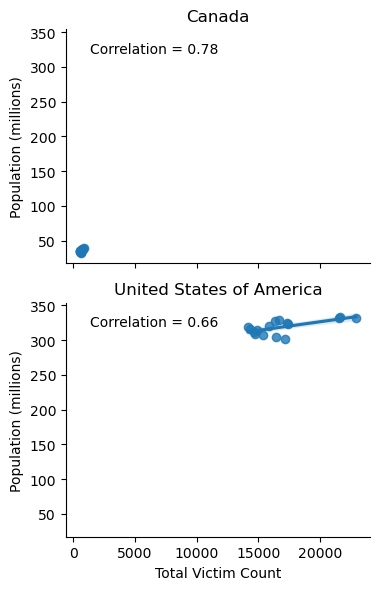

In [55]:
def annotatePerCap(data, **kws):
    r = data[['Victim Count', 'Pop in millions']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=1, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victim Count', y='Pop in millions')
g.map_dataframe(annotatePerCap)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Total Victim Count")
    ax.set_ylabel("Population (millions)")

# g.figure.subplots_adjust(top=0.8)
# g.figure.suptitle('Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanPopulationCorrPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


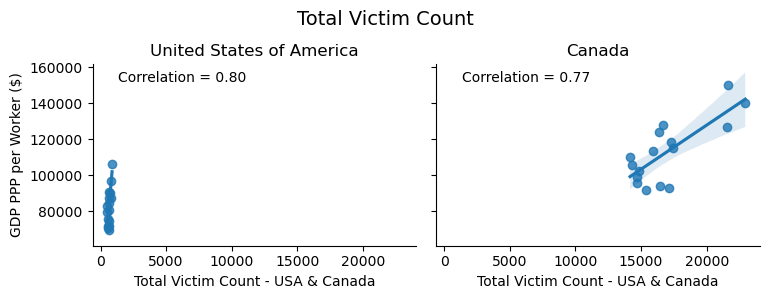

In [37]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Victim Count']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=2, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victim Count', y='GDP PPP per Worker')
g.map_dataframe(annotate)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries[i])
    ax.set_xlabel("Total Victim Count - USA & Canada")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('Total Victim Count', fontsize=14)
g.savefig('HomAndGdp_USACanVictimCountPosCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


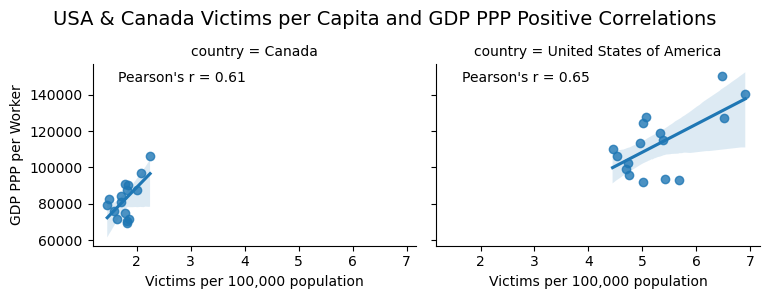

In [73]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpPositiveCountries, col='country', col_wrap=2, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP PPP per Worker')
g.map_dataframe(annotate)
g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('USA & Canada Victims per Capita and GDP PPP Positive Correlations', fontsize=14)
g.savefig('HomAndGdp_USACanVictimPerCapPosCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


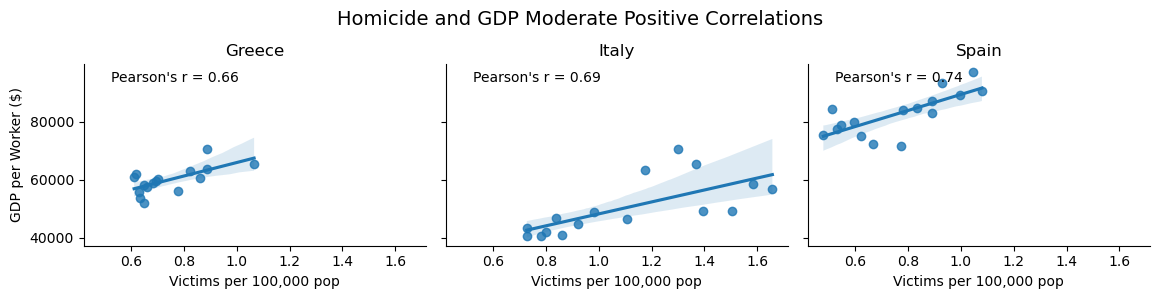

In [26]:
ModeratePosCountries = [
    'Greece', 'Italy', 'Spain'
]
HomAndGdpModeratePosCountries = HomAndGdp[HomAndGdp['country'].isin(ModeratePosCountries)]

def annotate(data, **kws):
    r = data[['GDP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpModeratePosCountries, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP per Worker')
g.map_dataframe(annotate)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(ModeratePosCountries[i])
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP per Worker ($)")

g.figure.subplots_adjust(top=0.8)
g.figure.suptitle('Homicide and GDP Moderate Positive Correlations', fontsize=14)
g.savefig('HomAndGdp_ModeratePosCorrRegPlot.png', dpi=300)

In [31]:
negativeCountries = [
'Australia', 'Belgium', 'Estonia', 'Finland', 'Italy', 
'Japan', 'Lithuania', 'Portugal', 'Republic of Korea'
]

HomAndGdpNegativeCountries = HomAndGdp[HomAndGdp['country'].isin(negativeCountries)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


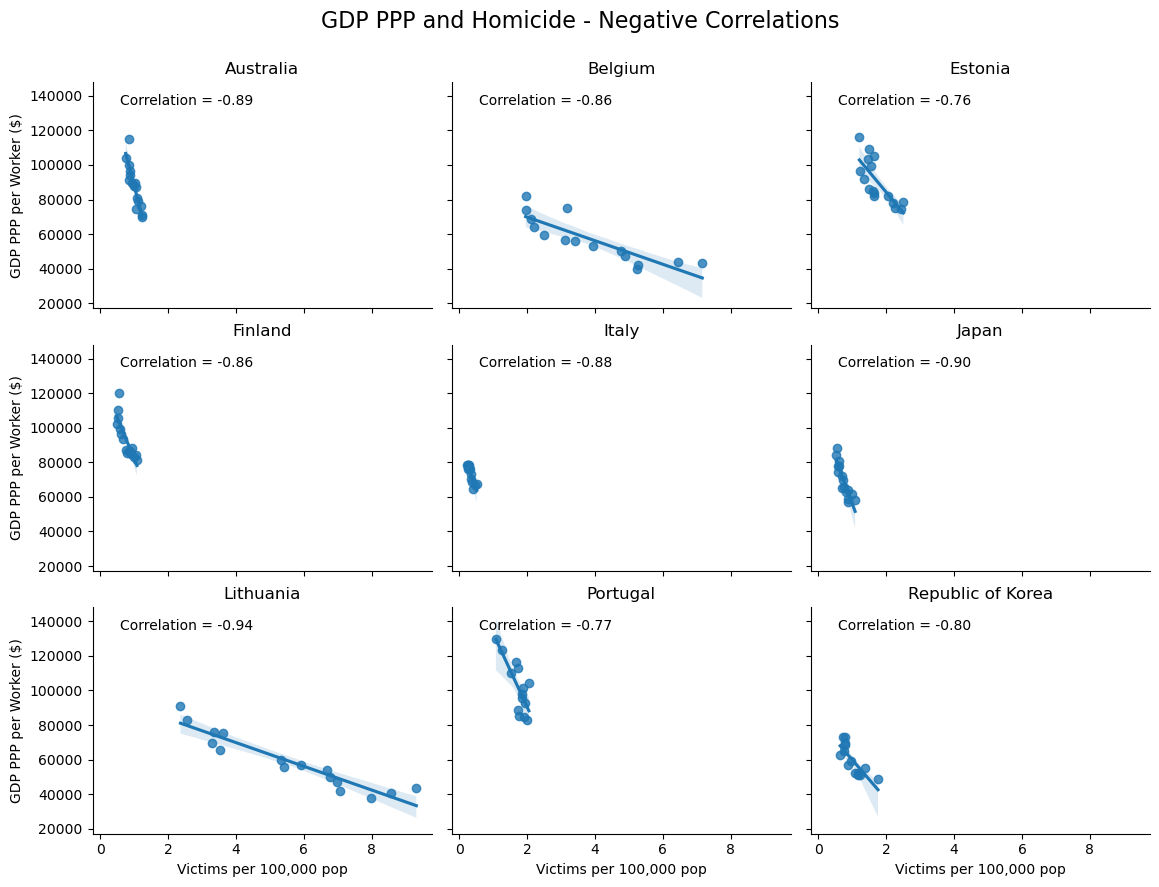

In [33]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Victims per 100,000 population']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HomAndGdpNegativeCountries, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Victims per 100,000 population', y='GDP PPP per Worker')
g.map_dataframe(annotate)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(negativeCountries[i])
    ax.set_xlabel("Victims per 100,000 pop")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('GDP PPP and Homicide - Negative Correlations', fontsize=16)
g.savefig('HomAndGdp_NegativeCorrRegPlot.png', dpi=300)